## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [ ]:
# Deactivate GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf

In [1]:
import tensorflow as tf 

#if tf.test.gpu_device_name(): 
    

#    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

#else:

#    print("Please install GPU version of TF")

In [2]:
# Restrict the GPU usage to required percentage

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# Print the GPU name
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# imagedatagenerator = read images and do data augmentation

In [5]:
# re-size all the images to this
# for full vgg16 - IMAGE_SIZE = (224, 224, 3)

#for only conv layers only
IMAGE_SIZE = [224, 224]

train_path = r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\train'
valid_path = r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\test'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

# vgg16 = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=True)
vgg19 = VGG19(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

# include_top=False - skip the flatten and output layer

In [7]:
vgg19.layers

In [8]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False
    
# this will freeze the above layers of vgg16 archtecture 

In [10]:
  # useful for getting number of output classes
folders = glob(r'cat and dog dataset\dataset\train\*')
folders

['cat and dog dataset\\dataset\\train\\cats',
 'cat and dog dataset\\dataset\\train\\dogs']

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)
x

<tf.Tensor 'flatten/Identity:0' shape=(None, 25088) dtype=float32>

In [12]:
vgg19.input
vgg19.output

<tf.Tensor 'block5_pool/Identity:0' shape=(None, 7, 7, 512) dtype=float32>

In [13]:
# adding output layer after x
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [14]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory(r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# model.fit also works
# due to data augmentation used, sometimes it gives error. so we use model.fit_generator.

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/4
250/250 [==============================] - 1829s 7s/step - loss: 0.3570 - accuracy: 0.8476 - val_loss: 0.2576 - val_accuracy: 0.8925
Epoch 2/4
250/250 [==============================] - 918s 4s/step - loss: 0.2459 - accuracy: 0.8971 - val_loss: 0.2238 - val_accuracy: 0.9035
Epoch 3/4
250/250 [==============================] - 997s 4s/step - loss: 0.2415 - accuracy: 0.8999 - val_loss: 0.2181 - val_accuracy: 0.9160
Epoch 4/4
250/250 [==============================] - 995s 4s/step - loss: 0.1944 - accuracy: 0.9201 - val_loss: 0.3298 - val_accuracy: 0.8875


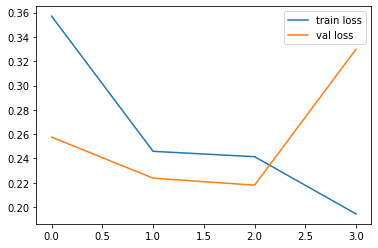

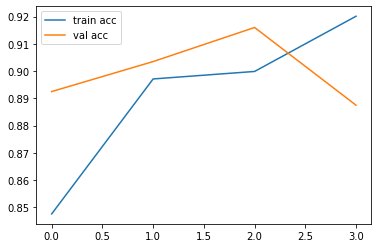

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [22]:

y_pred = model.predict(test_set)


In [23]:
y_pred

array([[2.5078103e-01, 7.4921900e-01],
       [3.1901425e-05, 9.9996805e-01],
       [1.1269250e-02, 9.8873073e-01],
       ...,
       [1.0000000e+00, 2.9870542e-08],
       [9.9944788e-01, 5.5211567e-04],
       [2.4191169e-10, 1.0000000e+00]], dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_vgg19.h5')

In [ ]:
img_data

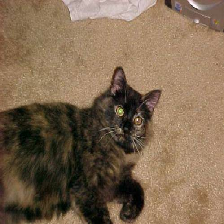

In [30]:
img=image.load_img(r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\test\cats\cat.4004.jpg',target_size=(224,224))
img


In [31]:
x=image.img_to_array(img)
x

array([[[122.,  91.,  70.],
        [130.,  99.,  78.],
        [118.,  90.,  68.],
        ...,
        [125.,  91.,  82.],
        [121.,  88.,  83.],
        [113.,  87.,  88.]],

       [[107.,  75.,  54.],
        [110.,  78.,  57.],
        [119.,  88.,  67.],
        ...,
        [126.,  96.,  88.],
        [119.,  88.,  83.],
        [113.,  88.,  84.]],

       [[119.,  84.,  64.],
        [120.,  85.,  65.],
        [128.,  93.,  73.],
        ...,
        [115.,  88.,  81.],
        [117.,  90.,  83.],
        [120.,  95.,  88.]],

       ...,

       [[ 79.,  57.,  46.],
        [ 83.,  58.,  51.],
        [ 81.,  52.,  48.],
        ...,
        [160., 127.,  94.],
        [150., 117.,  84.],
        [164., 131., 100.]],

       [[ 73.,  51.,  40.],
        [ 80.,  55.,  48.],
        [ 82.,  53.,  49.],
        ...,
        [186., 153., 120.],
        [174., 141., 108.],
        [158., 125.,  94.]],

       [[ 71.,  49.,  38.],
        [ 78.,  53.,  46.],
        [ 81.,  

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [36]:
result = model.predict(x)

In [37]:
a=np.argmax(result, axis=1)

In [40]:
if a==0:
    print("cats are here")
else:
    print("dogs are here")

cats are here
